In [ ]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

In [9]:
defect_dict = load_tensors_all('./Data/For_Andy11.24/TP_Paper/', width=128)

(61, 202, 115)
(67, 202, 115)
(79, 202, 115)
(77, 202, 115)
(76, 202, 115)
(18, 109, 204)
(10, 109, 204)
(13, 109, 204)
(23, 109, 204)
(18, 109, 204)
(9, 324, 178)
(72, 324, 178)
(67, 324, 178)
(17, 324, 178)
(2, 324, 178)


In [10]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 609
number of class 0: 159
	number of SN: 4
number of class 1: 149
	number of SN: 5
number of class 2: 117
	number of SN: 5
number of class 4: 96
	number of SN: 5
number of class 5: 88
	number of SN: 5


In [11]:
from defectlib import GroupKFold_modeling

In [ ]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=6, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 2
the s/n of validation image: F3Y62551RKDH9CC21
Train on 570 samples, validate on 39 samples
Epoch 1/10
570/570 [==============================] - 9s - loss: 1.4106 - acc: 0.3982 - val_loss: 0.8336 - val_acc: 0.9231
Epoch 2/10
570/570 [==============================] - 9s - loss: 0.9026 - acc: 0.6368 - val_loss: 0.5972 - val_acc: 1.0000
Epoch 3/10
570/570 [==============================] - 9s - loss: 0.7534 - acc: 0.6789 - val_loss: 0.2934 - val_acc: 1.0000
Epoch 4/10
570/570 [==============================] - 9s - loss: 0.5699 - acc: 0.7649 - val_loss: 0.1648 - val_acc: 1.0000
Epoch 5/10
570/570 [==============================] - 9s - loss: 0.4248 - acc: 0.8386 - val_loss: 0.1272 - val_acc: 1.0000
Epoch 6/10
570/570 [==============================] - 9s - loss: 0.3733 - acc: 0.8246 - val_loss: 0.0667 - val_acc: 1.0000
Epoch 7/10
570/570 [==============================] - 9s - loss: 0.3152 - acc: 0.8544 - val_loss: 0.0250 - val_acc: 1.0000
Epoch 

In [9]:
accuracy_dict

{0: 0.18937969924812031,
 1: 1.0,
 2: 0.80000000000000004,
 4: 0.20000000000000001,
 5: 0.69101449275362314}

In [10]:
escape_dict

{0: 0.18937969924812031,
 1: 0.0,
 2: 0.0,
 4: 0.23393939393939395,
 5: 0.3089855072463768}

In [14]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3X62610SZ2H9CC21', 0.17857142857142858, 0.17857142857142858),
 (0, 'F3X62821FE6H9CC21', 0.0, 0.0),
 (0, 'F3X62571GREH9CC21', 0.31578947368421051, 0.3157894736842105),
 (0, 'F3Y6262015EH9CC21', 0.26315789473684209, 0.2631578947368421),
 (1, 'F3Y62760Q82HPCC21', 1.0, 0.0),
 (1, 'F3Y6251VH7H9CC21', 1.0, 0.0),
 (1, 'F3X625518LTH9CC21', 1.0, 0.0),
 (1, 'F3Y62760ZVGH9CC21', 1.0, 0.0),
 (1, 'F3X62630KAXH9CC21', 1.0, 0.0),
 (2, 'F3Y62551RKDH9CC21', 1.0, 0.0),
 (2, 'F3Y62560U31H9CC21', 1.0, 0.0),
 (2, 'F3Y62750UWOH9CC21', 1.0, 0.0),
 (2, 'F3Y62520BMBH9CC21', 1.0, 0.0),
 (2, 'F3Y62560A97H9CC21', 0.0, 0.0),
 (4, 'F3Y62621YHFH9CC21', 0.0, 0.9696969696969697),
 (4, 'F3Y6256110XH9CC21', 0.0, 0.0),
 (4, 'F3Y62611EGEH9CC21', 1.0, 0.0),
 (4, 'F3X6271269AH9CC21', 0.0, 0.2),
 (4, 'F3Y62540DMTH9CC21', 0.0, 0.0),
 (5, 'F3Y62561UUPH9CC21', 0.52173913043478259, 0.4782608695652174),
 (5, 'F3Y62570EBNH9CC21', 0.75, 0.25),
 (5, 'F3X62671S1GH9CC21', 0.75, 0.25),
 (5, 'F3Y62610W71H9CC21', 0.5, 0.5),
 (5, '

In [12]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.68421053  0.73684211  0.82142857  1.        ]
[ 0.          0.17857143  0.26315789  0.31578947]
	Pick 1 test
		Tight Escape rate: 0.684210526316
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.710526315789
		rough Escape rate: 0.0892857142857
Result for label 1
[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 2
[ 0.  0.  0.  0.  1.]
[ 0.  0.  0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 4
[ 0.  1.  1.  1.  1.]
[ 0.          0.          0.          0.2         0.96969697]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.5
		rough Escape rate: 0.0
Result for label 5
[ 0.06666667  0.25        0.25        0.47826087  0.5       ]
[ 0.06666667  0.25        0.25   

In [15]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=6, nb_epoch=30, input_shape=(128, 128))

Model 1
the label of validation image: 2
the s/n of validation image: F3Y62551RKDH9CC21
Train on 570 samples, validate on 39 samples
Epoch 1/30
570/570 [==============================] - 9s - loss: 1.4772 - acc: 0.3877 - val_loss: 1.0533 - val_acc: 1.0000
Epoch 2/30
570/570 [==============================] - 9s - loss: 0.9105 - acc: 0.6316 - val_loss: 0.2685 - val_acc: 1.0000
Epoch 3/30
570/570 [==============================] - 9s - loss: 0.6996 - acc: 0.7175 - val_loss: 0.3381 - val_acc: 0.9744
Epoch 4/30
570/570 [==============================] - 9s - loss: 0.5465 - acc: 0.8000 - val_loss: 0.2614 - val_acc: 1.0000
Epoch 5/30
570/570 [==============================] - 9s - loss: 0.4454 - acc: 0.8316 - val_loss: 0.0462 - val_acc: 1.0000
Epoch 6/30
570/570 [==============================] - 9s - loss: 0.3362 - acc: 0.8596 - val_loss: 0.0142 - val_acc: 1.0000
Epoch 7/30
570/570 [==============================] - 9s - loss: 0.2973 - acc: 0.8754 - val_loss: 0.0072 - val_acc: 1.0000
Epoch 

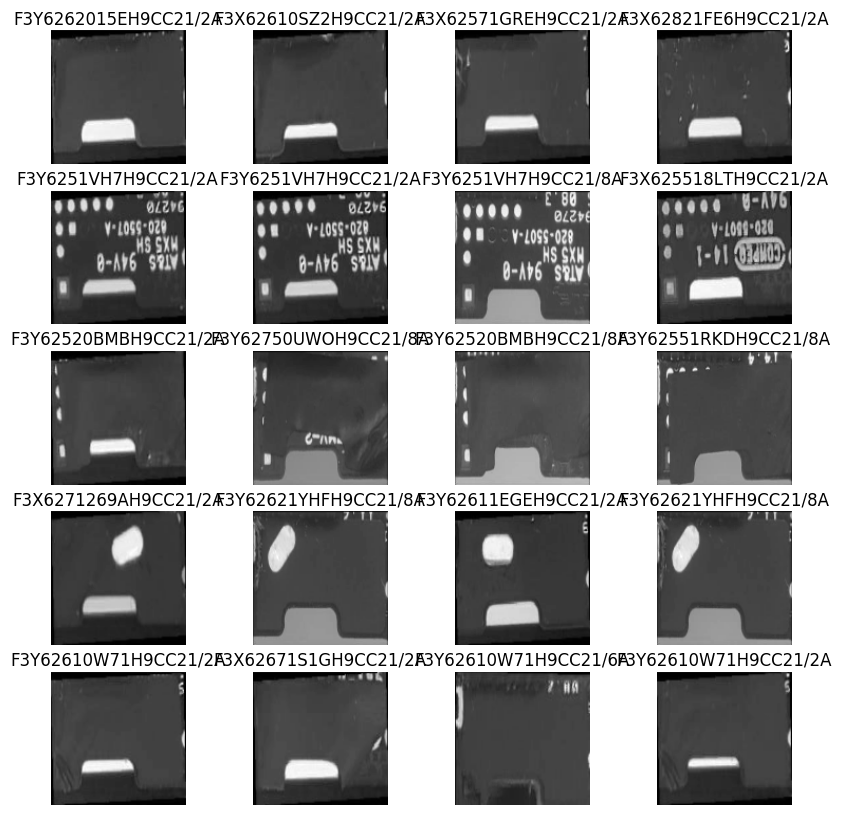

In [16]:
display_tensor(tensors, labels, sns)

In [17]:
accuracy_dict

{0: 0.3060064935064935,
 1: 1.0,
 2: 0.91249999999999998,
 4: 0.2814814814814815,
 5: 0.68913043478260871}

In [18]:
escape_dict

{0: 0.3060064935064935,
 1: 0.0,
 2: 0.0125,
 4: 0.4344444444444445,
 5: 0.3108695652173913}

In [21]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, 'F3X62610SZ2H9CC21', 0.17857142857142858, 0.17857142857142858),
 (0, 'F3X62821FE6H9CC21', 0.045454545454545456, 0.045454545454545456),
 (0, 'F3X62571GREH9CC21', 0.78947368421052633, 0.7894736842105263),
 (0, 'F3Y6262015EH9CC21', 0.21052631578947367, 0.21052631578947367),
 (1, 'F3Y62760Q82HPCC21', 1.0, 0.0),
 (1, 'F3Y6251VH7H9CC21', 1.0, 0.0),
 (1, 'F3X625518LTH9CC21', 1.0, 0.0),
 (1, 'F3Y62760ZVGH9CC21', 1.0, 0.0),
 (1, 'F3X62630KAXH9CC21', 1.0, 0.0),
 (2, 'F3Y62551RKDH9CC21', 1.0, 0.0),
 (2, 'F3Y62560U31H9CC21', 1.0, 0.0),
 (2, 'F3Y62750UWOH9CC21', 1.0, 0.0),
 (2, 'F3Y62520BMBH9CC21', 1.0, 0.0),
 (2, 'F3Y62560A97H9CC21', 0.5625, 0.0625),
 (4, 'F3Y62621YHFH9CC21', 0.0, 1.0),
 (4, 'F3Y6256110XH9CC21', 0.40740740740740738, 0.2222222222222222),
 (4, 'F3Y62611EGEH9CC21', 1.0, 0.0),
 (4, 'F3X6271269AH9CC21', 0.0, 0.95),
 (4, 'F3Y62540DMTH9CC21', 0.0, 0.0),
 (5, 'F3Y62561UUPH9CC21', 0.69565217391304346, 0.30434782608695654),
 (5, 'F3Y62570EBNH9CC21', 0.75, 0.25),
 (5, 'F3X62671S1GH9CC21

In [19]:
for label in set([x[0] for x in accuracy_escape_list]):
    accuracy_result = [x[2] for x in accuracy_escape_list if x[0] == label]
    accuracy_result.sort(reverse=True)
    accuracy_final = np.array(accuracy_result)
    escape_tight = 1 - accuracy_final
    escape_result = [x[3] for x in accuracy_escape_list if x[0] == label]
    escape_result.sort()
    escape_final = np.array(escape_result)
    escape_rough = escape_final
    print 'Result for label {}'.format(label)
    print escape_tight
    print escape_rough
    print "\tPick 1 test"
    print '\t\tTight Escape rate: {}'.format(escape_tight[0])
    print '\t\tRough Escape rate: {}'.format(escape_rough[0])
    print "\tPick 2 test"
    print "\t\tTight Escape rate: {}".format((escape_tight[0] + escape_tight[1]) / 2)
    print "\t\trough Escape rate: {}".format((escape_rough[0] + escape_rough[1]) / 2)

Result for label 0
[ 0.21052632  0.78947368  0.82142857  0.95454545]
[ 0.04545455  0.17857143  0.21052632  0.78947368]
	Pick 1 test
		Tight Escape rate: 0.210526315789
		Rough Escape rate: 0.0454545454545
	Pick 2 test
		Tight Escape rate: 0.5
		rough Escape rate: 0.112012987013
Result for label 1
[ 0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 2
[ 0.      0.      0.      0.      0.4375]
[ 0.      0.      0.      0.      0.0625]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.0
		rough Escape rate: 0.0
Result for label 4
[ 0.          0.59259259  1.          1.          1.        ]
[ 0.          0.          0.22222222  0.95        1.        ]
	Pick 1 test
		Tight Escape rate: 0.0
		Rough Escape rate: 0.0
	Pick 2 test
		Tight Escape rate: 0.296296296296
		rough Escape rate: 0.0
Result for label 5
[ 0.